# Master BigData UCM 2023

## 1. Datos COVID



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotnine
from plotnine import *

### Carga de datos

A partir del fichero ya guardado en disco de su lectura y primer pre-proceso

In [3]:
covid = pd.read_pickle("datos_covid.pkl")

In [4]:
covid.shape

(1299030, 8)

In [5]:
covid.describe(include = 'all')

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
count,1274520,1299030,1299030,1299030,1.299030e+06,1.299030e+06,1.299030e+06,1.299030e+06
unique,52,3,10,NaN,NaN,NaN,NaN,NaN
top,A,H,0-9,NaN,NaN,NaN,NaN,NaN
freq,24510,433010,129903,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2021-02-12 00:00:00.000000256,8.916302e+00,4.002325e-01,3.814539e-02,7.993349e-02
min,NaN,NaN,NaN,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,2020-07-23 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,2021-02-12 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,2021-09-04 00:00:00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,NaN,NaN,NaN,2022-03-27 00:00:00,3.749000e+03,2.710000e+02,3.500000e+01,1.000000e+02


# 2. Visualizaciones con ggplot

Además del contenido recogido en la docu. teórica, es aconsejable seguir este excelente (y práctico) tutorial:

https://realpython.com/ggplot-python/


## 2.1 Barplot por sexo y edad



In [6]:
covid2 = covid.groupby(['sexo', 'grupo_edad']).sum(numeric_only = True)
covid2 = pd.DataFrame(covid2.to_records())


In [7]:
covid2

,sexo,grupo_edad,num_casos,num_hosp,num_uci,num_def
0,H,0-9,551068,3356,177,15
1,H,10-19,763040,2375,192,15
2,H,20-29,772202,6641,527,78
3,H,30-39,808200,14199,1392,209
4,H,40-49,969947,31562,3690,749
5,H,50-59,705194,46558,7072,2746
6,H,60-69,417976,55989,10651,7444
7,H,70-79,262040,57114,8495,14781
8,H,80+,197154,65760,1409,31312
9,H,NC,1965,130,9,19


In [8]:
mascara_sexo = covid2['sexo'] != 'NC'
mascara_grupo_edad = covid2['grupo_edad'] != 'NC'
covid2 = covid2[mascara_sexo]
covid2 = covid2[mascara_grupo_edad]


/tmp/ipykernel_595656/1743903409.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [9]:
covid2

,sexo,grupo_edad,num_casos,num_hosp,num_uci,num_def
0,H,0-9,551068,3356,177,15
1,H,10-19,763040,2375,192,15
2,H,20-29,772202,6641,527,78
3,H,30-39,808200,14199,1392,209
4,H,40-49,969947,31562,3690,749
5,H,50-59,705194,46558,7072,2746
6,H,60-69,417976,55989,10651,7444
7,H,70-79,262040,57114,8495,14781
8,H,80+,197154,65760,1409,31312
10,M,0-9,519666,2591,130,9


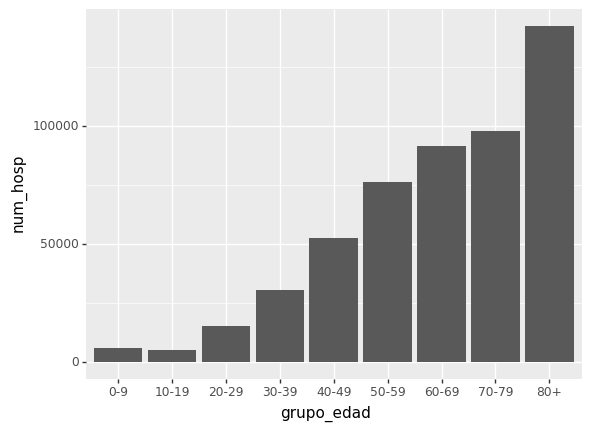

<ggplot: (8781093711527)>

In [10]:
(
ggplot(covid2)
+ aes(x = 'grupo_edad',
      y = 'num_hosp')
    + geom_bar(stat = "identity")
)

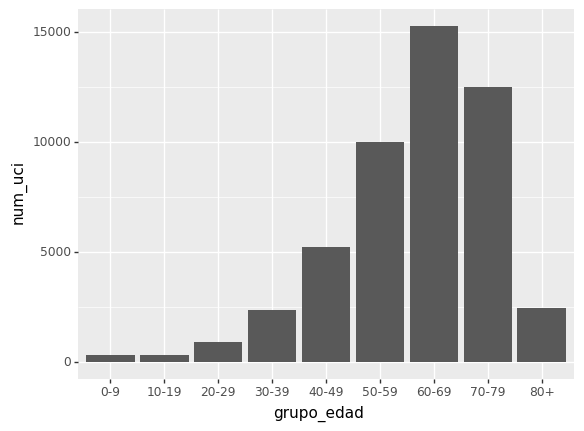

<ggplot: (8781092962647)>

In [11]:
(
ggplot(covid2)
+ aes(x = 'grupo_edad',
      y = 'num_uci')
    + geom_bar(stat = "identity")
)

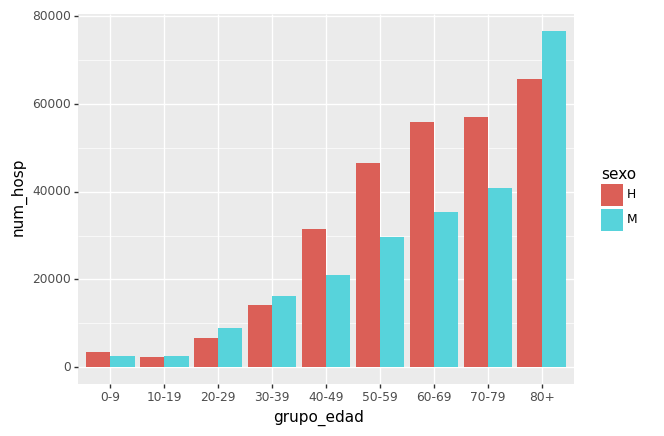

<ggplot: (8781086072808)>

In [13]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_hosp',
          fill = 'sexo')  # What variable to use
    + geom_bar(stat = "identity",
              position = 'dodge') # Geometric object to use for drawing
   
)

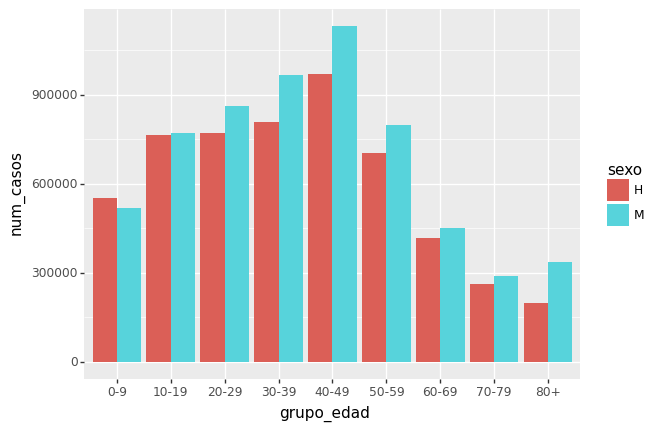

<ggplot: (8781086082811)>

In [14]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_casos',
          fill = 'sexo')  # What variable to use
    + geom_bar(stat = "identity",
              position = 'dodge') # Geometric object to use for drawing
   
)

In [15]:
grafico = (
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_casos',
          fill = 'sexo')  # What variable to use
    + geom_bar(stat = "identity",
              position = 'dodge') # Geometric object to use for drawing
   
)

In [16]:
grafico2 = grafico + ( coord_flip())

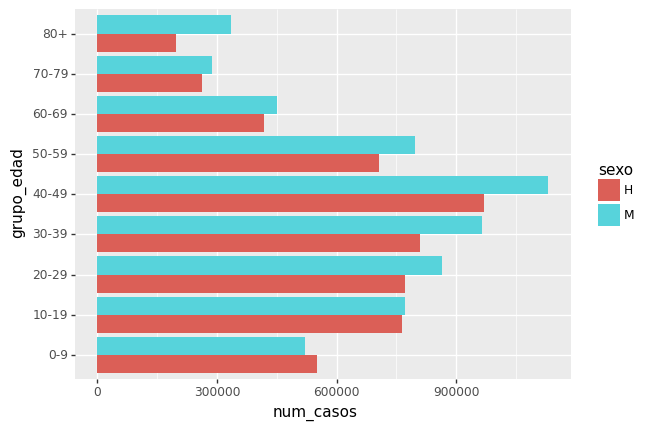

<ggplot: (8781093711545)>

In [17]:
grafico2

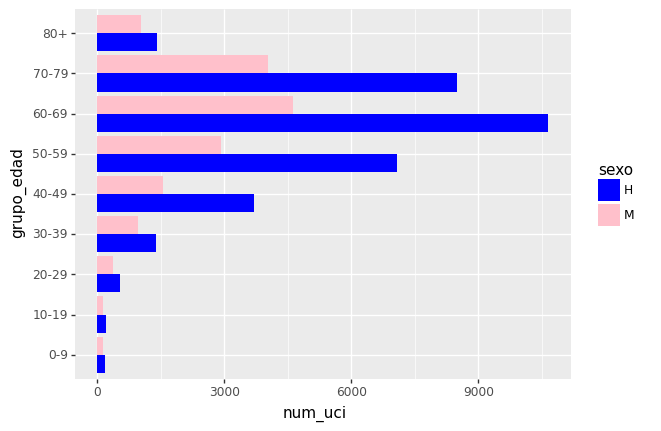

<ggplot: (8781085952760)>

In [18]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_uci',
          fill = 'sexo')  # What variable to use
    + geom_bar(stat = "identity",
              position = 'dodge') # Geometric object to use for drawing
    + coord_flip()
    + scale_fill_manual(values = ("blue", "pink"))
)

In [ ]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_uci',
          fill = 'sexo')  # What variable to use
    + geom_bar(position = "dodge",
               stat = "identity")
    + coord_flip()# Geometric object to use for drawing
   
)

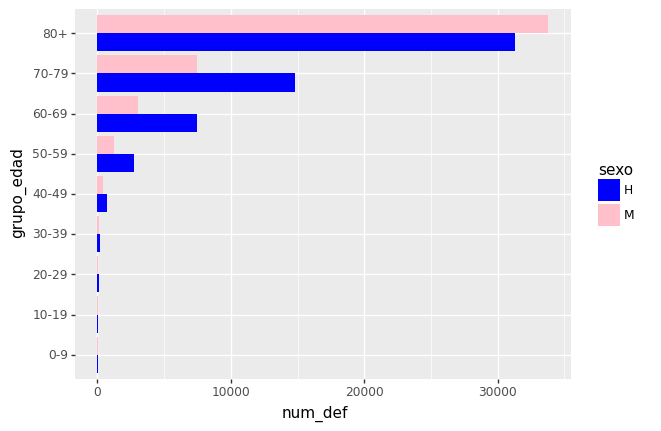

<ggplot: (8781085952979)>

In [19]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_def',
          fill = 'sexo')  # What variable to use
    + geom_bar(position = "dodge",
               stat = "identity") # Geometric object to use for drawing
    + coord_flip()
    + scale_fill_manual(values = ("blue", "pink"))
   
)

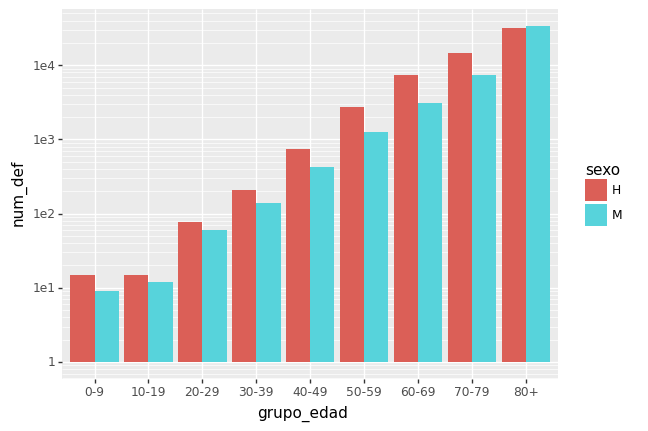

<ggplot: (8781086082733)>

In [20]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_def',
          fill = 'sexo')  # What variable to use
    + geom_bar(position = "dodge",
               stat = "identity")
    + scale_y_log10()# Geometric object to use for drawing
   
)

## 2.2 Olas (series temporales)



In [21]:
covid3 = covid.groupby(['sexo', 'fecha']).sum()
covid3 = pd.DataFrame(covid3.to_records())
mascara_sexo = covid3['sexo'] != 'NC'
#mascara_grupo_edad = covid3['grupo_edad'] != 'NC'
covid3 = covid3[mascara_sexo]
#covid2 = covid3[mascara_grupo_edad]


In [22]:
covid3.head()

,sexo,fecha,provincia_iso,grupo_edad,num_casos,num_hosp,num_uci,num_def
0,H,2020-01-01,AAAAAAAAAAABABABABABABABABABABALALALALALALALAL...,0-910-1920-2930-3940-4950-5960-6970-7980+NC0-9...,0,5,0,0
1,H,2020-01-02,AAAAAAAAAAABABABABABABABABABABALALALALALALALAL...,0-910-1920-2930-3940-4950-5960-6970-7980+NC0-9...,0,43,1,0
2,H,2020-01-03,AAAAAAAAAAABABABABABABABABABABALALALALALALALAL...,0-910-1920-2930-3940-4950-5960-6970-7980+NC0-9...,0,2,0,0
3,H,2020-01-04,AAAAAAAAAAABABABABABABABABABABALALALALALALALAL...,0-910-1920-2930-3940-4950-5960-6970-7980+NC0-9...,0,2,0,0
4,H,2020-01-05,AAAAAAAAAAABABABABABABABABABABALALALALALALALAL...,0-910-1920-2930-3940-4950-5960-6970-7980+NC0-9...,0,3,0,0


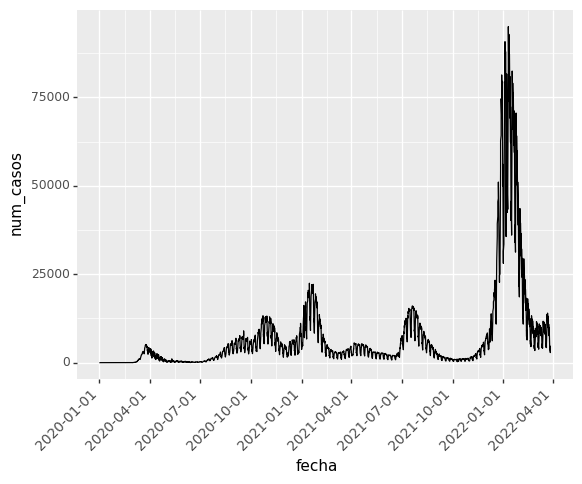

<ggplot: (8781086161176)>

In [23]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_casos")  # What variable to use
    + geom_line() 
    + theme(axis_text_x = element_text(angle = 45, 
                                       hjust = 1,
                                       size = 10))# Geometric object to use for drawing
)

In [29]:
g = (
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_casos",
         color = 'sexo')  # What variable to use
    + geom_smooth(method = "lowess", 
                  span = 0.05)  # Geometric object to use for drawing
)

/home/pedro/Escritorio/UCM_2023/master_ucm/lib/python3.10/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/pedro/Escritorio/UCM_2023/master_ucm/lib/python3.10/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


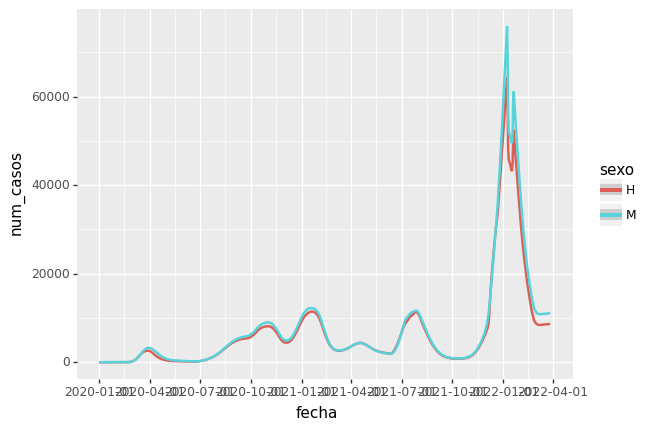

<ggplot: (8781083963702)>

In [30]:
g

In [26]:
g = g + theme(figure_size=(12, 10))

/home/pedro/Escritorio/UCM_2023/master_ucm/lib/python3.10/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/pedro/Escritorio/UCM_2023/master_ucm/lib/python3.10/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


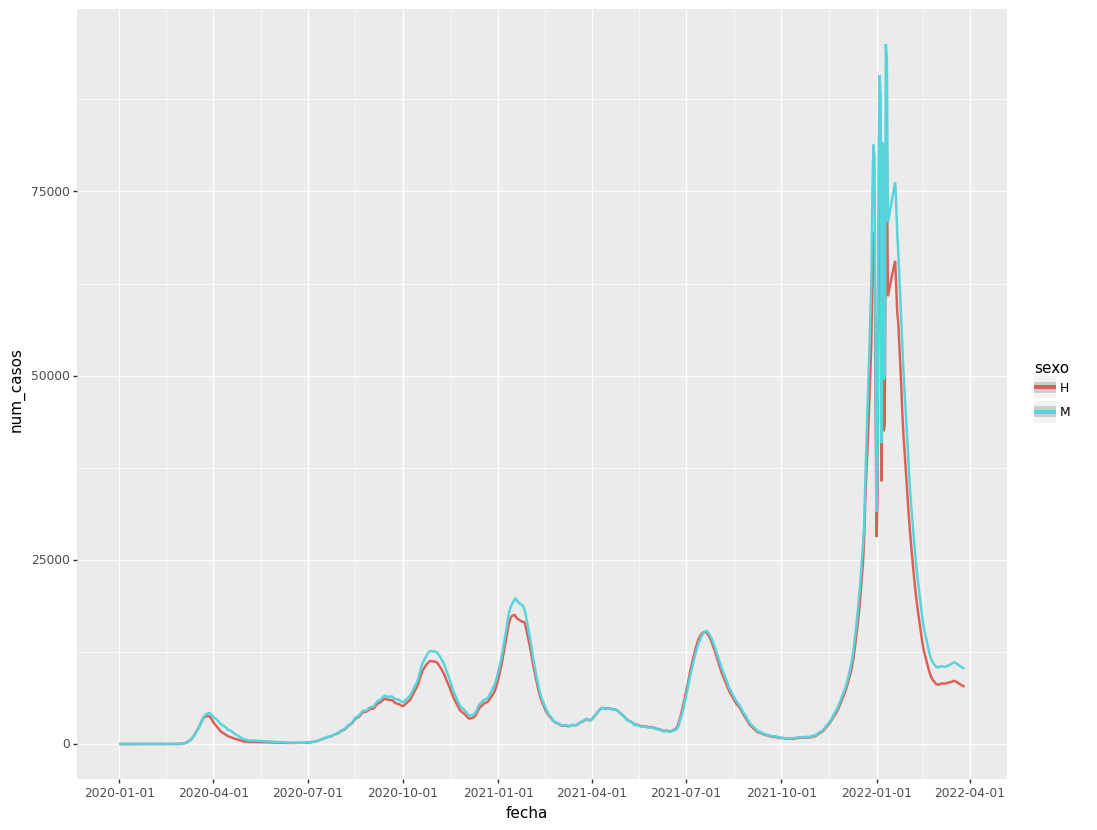

<ggplot: (8781085661560)>

In [27]:
g

In [31]:
g.save('olas01.png', dpi=600)

/home/pedro/Escritorio/UCM_2023/master_ucm/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/pedro/Escritorio/UCM_2023/master_ucm/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: olas01.png
/home/pedro/Escritorio/UCM_2023/master_ucm/lib/python3.10/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/pedro/Escritorio/UCM_2023/master_ucm/lib/python3.10/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [ ]:
g + theme(axis_text_x = element_text(angle = -45, 
                                     vjust = 1))

In [ ]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_casos",
          color = 'sexo')  # What variable to use
    + geom_line()  # Geometric object to use for drawing
)

In [ ]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_casos",
          color = 'sexo')  # What variable to use
    + geom_smooth(method = "lowess", 
                  span = 0.05)  # Geometric object to use for drawing
)

In [ ]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_uci",
          color = 'sexo')  # What variable to use
    + geom_smooth(method = "lowess", 
                  span = 0.10)  # Geometric object to use for drawing
)

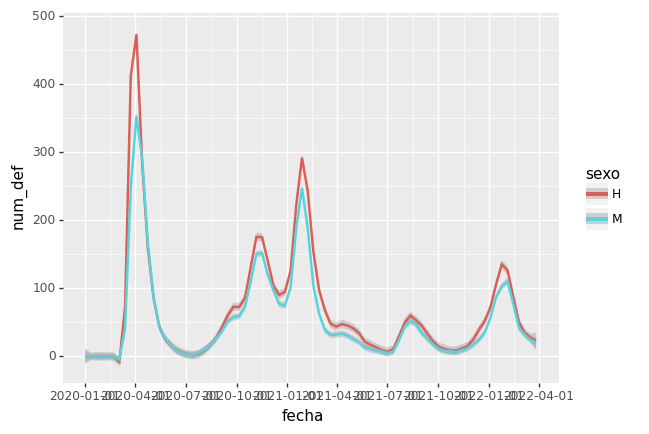

<ggplot: (8781081838073)>

In [32]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_def",
          color = 'sexo')  # What variable to use
    + geom_smooth(method = "loess", 
                  span = 0.05)  # Geometric object to use for drawing
)